In [ ]:
import pandas as pd
import merge_module
import visualization

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Feature data

In [ ]:
ASOSdata = pd.read_csv('/content/gdrive/MyDrive/SolarPower/ASOSdata.csv')
PMdata = pd.read_csv('/content/gdrive/MyDrive/SolarPower/PMdata.csv')

In [ ]:
ASOSdata['일자'] = pd.to_datetime(ASOSdata['일자'], format="%Y-%M-%d").dt.strftime("%Y-%M-%d")
ASOSdata.sort_values(['지점명','년도','일자'], inplace=True)
ASOSdata.reset_index(drop=True, inplace=True)
ASOSdata

,지점명,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,년도,일자
0,강릉,4.3,NaN,4.1,290.0,45.0,1026.8,NaN,NaN,NaN,3870.0,0,2017,2017-01-01
1,강릉,4.3,NaN,5.1,290.0,46.0,1027.2,NaN,NaN,NaN,3874.0,1,2017,2017-01-01
2,강릉,4.4,NaN,4.4,290.0,44.0,1027.0,NaN,NaN,NaN,4019.0,2,2017,2017-01-01
3,강릉,4.3,NaN,3.5,320.0,44.0,1027.1,NaN,NaN,NaN,4802.0,3,2017,2017-01-01
4,강릉,4.2,NaN,3.4,320.0,44.0,1026.8,NaN,NaN,NaN,3755.0,4,2017,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131459,진주,0.1,NaN,3.4,250.0,56.0,1024.3,NaN,NaN,0.0,2000.0,19,2020,2020-12-31
131460,진주,-0.2,NaN,3.0,250.0,63.0,1024.6,NaN,NaN,7.0,2000.0,20,2020,2020-12-31
131461,진주,0.1,NaN,2.4,250.0,60.0,1024.5,NaN,NaN,1.0,2000.0,21,2020,2020-12-31
131462,진주,-0.9,NaN,0.5,270.0,65.0,1024.8,NaN,NaN,9.0,2000.0,22,2020,2020-12-31


In [ ]:
PMdata['일자'] = pd.to_datetime(PMdata['일자'], format="%Y%M%d").dt.strftime("%Y-%M-%d")
PMdata.sort_values(['지점명','년도','일자'], inplace=True)
PMdata.reset_index(drop=True, inplace=True)
PMdata

,지역,일자,년도,시간,PM10,PM25,지점명
0,강원 강릉시,2013-01-01,2013,1,30.0,NaN,강릉
1,강원 강릉시,2013-01-01,2013,2,28.0,NaN,강릉
2,강원 강릉시,2013-01-01,2013,3,28.0,NaN,강릉
3,강원 강릉시,2013-01-01,2013,5,24.0,NaN,강릉
4,강원 강릉시,2013-01-01,2013,6,28.0,NaN,강릉
...,...,...,...,...,...,...,...
209539,경남 진주시,2020-12-31,2020,19,13.0,6.0,진주
209540,경남 진주시,2020-12-31,2020,20,16.0,9.0,진주
209541,경남 진주시,2020-12-31,2020,21,19.0,8.0,진주
209542,경남 진주시,2020-12-31,2020,22,18.0,7.0,진주


# Target data

In [ ]:
PVdata = pd.read_csv('/content/gdrive/MyDrive/SolarPower/PVdata.csv')
PVdata

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,년도,지역,일자
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,75.552,306.528,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2017,강원 강릉시,2017-01-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,82.752,289.152,...,0.096,0.0,0.0,0.0,0.0,0.0,0.0,2017,강원 강릉시,2017-01-02
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,81.984,314.208,...,0.960,0.0,0.0,0.0,0.0,0.0,0.0,2017,강원 강릉시,2017-01-03
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,72.480,295.104,...,0.768,0.0,0.0,0.0,0.0,0.0,0.0,2017,강원 강릉시,2017-01-04
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.288,18.048,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2017,강원 강릉시,2017-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,15.480,147.960,...,6.120,0.0,0.0,0.0,0.0,0.0,0.0,2019,전남 목포시,2019-12-27
5399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,52.560,282.840,...,9.720,0.0,0.0,0.0,0.0,0.0,0.0,2019,전남 목포시,2019-12-28
5400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,16.680,54.960,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2019,전남 목포시,2019-12-29
5401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.000,34.320,...,0.120,0.0,0.0,0.0,0.0,0.0,0.0,2019,전남 목포시,2019-12-30


In [ ]:
Solardata = merge_module.Format_PV(PVdata, '일자', ['일자','지역','년도'])
Solardata

,일자,지역,년도,시간,발전량
0,2017-01-01,강원 강릉시,2017,1,0.0
1,2017-01-01,강원 강릉시,2017,2,0.0
2,2017-01-01,강원 강릉시,2017,3,0.0
3,2017-01-01,강원 강릉시,2017,4,0.0
4,2017-01-01,강원 강릉시,2017,5,0.0
...,...,...,...,...,...
129667,2019-12-31,전남 목포시,2019,20,0.0
129668,2019-12-31,전남 목포시,2019,21,0.0
129669,2019-12-31,전남 목포시,2019,22,0.0
129670,2019-12-31,전남 목포시,2019,23,0.0


# Regional mapping

In [ ]:
area_list = ['전남 목포시', '강원 강릉시', '경남 진주시']
Solar_Mp, Solar_Gn, Solar_Jj = merge_module.Split_area(Solardata, '지역', area_list)

전체 : (129672, 5)
목포시 : (61344, 5)
강릉시 : (35064, 5)
진주시 : (33264, 5)


In [ ]:
area_list = ['전남 목포시', '강원 강릉시', '경남 진주시']
PM_Mp, PM_Gn, PM_Jj  = merge_module.Split_area(PMdata, '지역', area_list)

전체 : (209544, 7)
목포시 : (69581, 7)
강릉시 : (70010, 7)
진주시 : (69953, 7)


In [ ]:
area_list = ['목포', '강릉', '진주']
ASOS_Mp, ASOS_Gn, ASOS_Jj  = merge_module.Split_area(ASOSdata, '지점명', area_list)

전체 : (131464, 14)
목포시 : (61343, 14)
강릉시 : (35063, 14)
진주시 : (35058, 14)


## Mokpo

In [ ]:
Mp_data = pd.merge(Solar_Mp, PM_Mp, how='inner', on=['일자','년도','시간','지역'])
Mp_data

,일자,지역,년도,시간,발전량,PM10,PM25,지점명
0,2013-01-01,전남 목포시,2013,1,0.0,44.0,NaN,목포
1,2013-01-01,전남 목포시,2013,2,0.0,34.0,NaN,목포
2,2013-01-01,전남 목포시,2013,3,0.0,41.0,NaN,목포
3,2013-01-01,전남 목포시,2013,4,0.0,41.0,NaN,목포
4,2013-01-01,전남 목포시,2013,5,0.0,35.0,NaN,목포
...,...,...,...,...,...,...,...,...
60792,2019-12-31,전남 목포시,2019,20,0.0,13.0,6.0,목포
60793,2019-12-31,전남 목포시,2019,21,0.0,17.0,8.0,목포
60794,2019-12-31,전남 목포시,2019,22,0.0,13.0,5.0,목포
60795,2019-12-31,전남 목포시,2019,23,0.0,8.0,7.0,목포


In [ ]:
Mp_data[Mp_data['시간'] == 24]

,일자,지역,년도,시간,발전량,PM10,PM25,지점명
23,2013-01-01,전남 목포시,2013,24,0.0,135.0,NaN,목포
45,2013-01-02,전남 목포시,2013,24,0.0,21.0,NaN,목포
68,2013-01-03,전남 목포시,2013,24,0.0,27.0,NaN,목포
92,2013-01-04,전남 목포시,2013,24,0.0,36.0,NaN,목포
116,2013-01-05,전남 목포시,2013,24,0.0,37.0,NaN,목포
...,...,...,...,...,...,...,...,...
60700,2019-12-27,전남 목포시,2019,24,0.0,22.0,10.0,목포
60724,2019-12-28,전남 목포시,2019,24,0.0,71.0,38.0,목포
60748,2019-12-29,전남 목포시,2019,24,0.0,16.0,16.0,목포
60772,2019-12-30,전남 목포시,2019,24,0.0,33.0,12.0,목포


In [ ]:
# 시간이 0-23이 24시를 0으로 변경 (밤의 데이터는 예측에 사용되지 않기에 임의의 숫자로 변경함)
Mp_data['시간'] = Mp_data['시간'].replace(24, 0)

In [ ]:
print(ASOS_Mp['시간'].unique())
print(Mp_data['시간'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]


In [ ]:
Mp_df = pd.merge(Mp_data, ASOS_Mp, how='inner', on=['일자','년도','시간','지점명'])
Mp_df.drop(columns = ['년도', '지점명'], inplace=True)
Mp_df['월'] = pd.to_datetime(Mp_df['일자']).dt.month
Mp_df

,일자,지역,시간,발전량,PM10,PM25,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,월
0,2013-01-01,전남 목포시,1,0.0,44.0,NaN,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,1
1,2013-01-01,전남 목포시,2,0.0,34.0,NaN,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,1
2,2013-01-01,전남 목포시,3,0.0,41.0,NaN,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,1
3,2013-01-01,전남 목포시,4,0.0,41.0,NaN,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,1
4,2013-01-01,전남 목포시,5,0.0,35.0,NaN,-2.4,NaN,3.0,160.0,91.0,1019.3,NaN,NaN,10.0,1200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60791,2019-12-31,전남 목포시,20,0.0,13.0,6.0,-2.8,NaN,4.6,20.0,65.0,1033.9,NaN,NaN,7.0,2000.0,12
60792,2019-12-31,전남 목포시,21,0.0,17.0,8.0,-2.8,NaN,3.3,20.0,65.0,1033.9,NaN,NaN,9.0,2000.0,12
60793,2019-12-31,전남 목포시,22,0.0,13.0,5.0,-2.6,NaN,4.7,20.0,63.0,1033.5,NaN,NaN,9.0,2000.0,12
60794,2019-12-31,전남 목포시,23,0.0,8.0,7.0,-2.4,NaN,3.8,20.0,62.0,1033.4,NaN,NaN,8.0,2000.0,12


## Gangneung

In [ ]:
Gn_data = pd.merge(Solar_Gn, PM_Gn, how='inner', on=['일자','년도','시간','지역'])
Gn_data

,일자,지역,년도,시간,발전량,PM10,PM25,지점명
0,2017-01-01,강원 강릉시,2017,1,0.000,63.0,51.0,강릉
1,2017-01-01,강원 강릉시,2017,2,0.000,63.0,57.0,강릉
2,2017-01-01,강원 강릉시,2017,3,0.000,64.0,49.0,강릉
3,2017-01-01,강원 강릉시,2017,4,0.000,61.0,50.0,강릉
4,2017-01-01,강원 강릉시,2017,5,0.000,61.0,42.0,강릉
...,...,...,...,...,...,...,...,...
35059,2020-12-31,강원 강릉시,2020,20,342.336,24.0,NaN,강릉
35060,2020-12-31,강원 강릉시,2020,21,664.800,21.0,NaN,강릉
35061,2020-12-31,강원 강릉시,2020,22,692.736,32.0,NaN,강릉
35062,2020-12-31,강원 강릉시,2020,23,139.008,22.0,NaN,강릉


In [ ]:
print(ASOS_Gn['시간'].unique())
print(Gn_data['시간'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [ ]:
Gn_data['시간'] = Gn_data['시간'].replace(24, 0)

In [ ]:
ASOS_Gn

,지점명,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,년도,일자
0,강릉,4.3,NaN,4.1,290.0,45.0,1026.8,NaN,NaN,NaN,3870.0,0,2017,2017-01-01
1,강릉,4.3,NaN,5.1,290.0,46.0,1027.2,NaN,NaN,NaN,3874.0,1,2017,2017-01-01
2,강릉,4.4,NaN,4.4,290.0,44.0,1027.0,NaN,NaN,NaN,4019.0,2,2017,2017-01-01
3,강릉,4.3,NaN,3.5,320.0,44.0,1027.1,NaN,NaN,NaN,4802.0,3,2017,2017-01-01
4,강릉,4.2,NaN,3.4,320.0,44.0,1026.8,NaN,NaN,NaN,3755.0,4,2017,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,강릉,-4.0,NaN,5.4,230.0,40.0,1020.0,NaN,NaN,0.0,4333.0,19,2020,2020-12-31
35059,강릉,-4.3,NaN,6.4,230.0,41.0,1020.4,NaN,NaN,0.0,4853.0,20,2020,2020-12-31
35060,강릉,-4.8,NaN,5.0,230.0,43.0,1021.3,NaN,NaN,0.0,3707.0,21,2020,2020-12-31
35061,강릉,-4.9,NaN,5.3,230.0,42.0,1021.6,NaN,NaN,2.0,4694.0,22,2020,2020-12-31


In [ ]:
Gn_df = pd.merge(Gn_data, ASOS_Gn, how='inner', on=['일자','년도','시간','지점명'])
Gn_df.drop(columns = ['년도', '지점명'], inplace=True)
Gn_df['월'] = pd.to_datetime(Gn_df['일자']).dt.month
Gn_df

,일자,지역,시간,발전량,PM10,PM25,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,월
0,2017-01-01,강원 강릉시,1,0.000,63.0,51.0,4.3,NaN,5.1,290.0,46.0,1027.2,NaN,NaN,NaN,3874.0,1
1,2017-01-01,강원 강릉시,2,0.000,63.0,57.0,4.4,NaN,4.4,290.0,44.0,1027.0,NaN,NaN,NaN,4019.0,1
2,2017-01-01,강원 강릉시,3,0.000,64.0,49.0,4.3,NaN,3.5,320.0,44.0,1027.1,NaN,NaN,NaN,4802.0,1
3,2017-01-01,강원 강릉시,4,0.000,61.0,50.0,4.2,NaN,3.4,320.0,44.0,1026.8,NaN,NaN,NaN,3755.0,1
4,2017-01-01,강원 강릉시,5,0.000,61.0,42.0,4.2,NaN,3.2,320.0,45.0,1027.1,NaN,NaN,NaN,3201.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,2020-12-31,강원 강릉시,20,342.336,24.0,NaN,-4.3,NaN,6.4,230.0,41.0,1020.4,NaN,NaN,0.0,4853.0,12
35059,2020-12-31,강원 강릉시,21,664.800,21.0,NaN,-4.8,NaN,5.0,230.0,43.0,1021.3,NaN,NaN,0.0,3707.0,12
35060,2020-12-31,강원 강릉시,22,692.736,32.0,NaN,-4.9,NaN,5.3,230.0,42.0,1021.6,NaN,NaN,2.0,4694.0,12
35061,2020-12-31,강원 강릉시,23,139.008,22.0,NaN,-5.0,NaN,5.0,250.0,39.0,1021.5,NaN,NaN,0.0,5000.0,12


## Jinjo

In [ ]:
Jj_data = pd.merge(Solar_Jj, PM_Jj, how='inner', on=['일자','년도','시간','지역'])
Jj_data

,일자,지역,년도,시간,발전량,PM10,PM25,지점명
0,2017-01-01,경남 진주시,2017,1,0.0,58.0,NaN,진주
1,2017-01-01,경남 진주시,2017,2,0.0,54.0,NaN,진주
2,2017-01-01,경남 진주시,2017,3,0.0,51.0,NaN,진주
3,2017-01-01,경남 진주시,2017,4,0.0,51.0,NaN,진주
4,2017-01-01,경남 진주시,2017,5,0.0,46.0,NaN,진주
...,...,...,...,...,...,...,...,...
33259,2020-11-16,경남 진주시,2020,20,0.0,NaN,NaN,진주
33260,2020-11-16,경남 진주시,2020,21,0.0,NaN,NaN,진주
33261,2020-11-16,경남 진주시,2020,22,0.0,NaN,NaN,진주
33262,2020-11-16,경남 진주시,2020,23,0.0,NaN,NaN,진주


In [ ]:
print(ASOS_Jj['시간'].unique())
print(Jj_data['시간'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [ ]:
Jj_data['시간'] = Jj_data['시간'].replace(24, 0)

In [ ]:
ASOS_Jj

,지점명,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,시간,년도,일자
0,진주,-2.4,NaN,0.0,0.0,85.0,1030.4,NaN,NaN,NaN,720.0,0,2017,2017-01-01
1,진주,-3.0,NaN,0.1,0.0,86.0,1030.1,NaN,NaN,NaN,700.0,1,2017,2017-01-01
2,진주,-3.1,NaN,0.0,0.0,87.0,1030.5,NaN,NaN,NaN,637.0,2,2017,2017-01-01
3,진주,-3.5,NaN,0.1,0.0,88.0,1030.7,NaN,NaN,NaN,626.0,3,2017,2017-01-01
4,진주,-3.6,NaN,0.3,0.0,88.0,1030.1,NaN,NaN,NaN,573.0,4,2017,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35053,진주,0.1,NaN,3.4,250.0,56.0,1024.3,NaN,NaN,0.0,2000.0,19,2020,2020-12-31
35054,진주,-0.2,NaN,3.0,250.0,63.0,1024.6,NaN,NaN,7.0,2000.0,20,2020,2020-12-31
35055,진주,0.1,NaN,2.4,250.0,60.0,1024.5,NaN,NaN,1.0,2000.0,21,2020,2020-12-31
35056,진주,-0.9,NaN,0.5,270.0,65.0,1024.8,NaN,NaN,9.0,2000.0,22,2020,2020-12-31


In [ ]:
Jj_df = pd.merge(Jj_data, ASOS_Jj, how='inner', on=['일자','년도','시간','지점명'])
Jj_df.drop(columns = ['년도', '지점명'], inplace=True)
Jj_df['월'] = pd.to_datetime(Jj_df['일자']).dt.month
Jj_df

,일자,지역,시간,발전량,PM10,PM25,기온,강수량,풍속,풍향,습도,해면기압,일조,일사,전운량,시정,월
0,2017-01-01,경남 진주시,1,0.0,58.0,NaN,-3.0,NaN,0.1,0.0,86.0,1030.1,NaN,NaN,NaN,700.0,1
1,2017-01-01,경남 진주시,2,0.0,54.0,NaN,-3.1,NaN,0.0,0.0,87.0,1030.5,NaN,NaN,NaN,637.0,1
2,2017-01-01,경남 진주시,3,0.0,51.0,NaN,-3.5,NaN,0.1,0.0,88.0,1030.7,NaN,NaN,NaN,626.0,1
3,2017-01-01,경남 진주시,4,0.0,51.0,NaN,-3.6,NaN,0.3,0.0,88.0,1030.1,NaN,NaN,NaN,573.0,1
4,2017-01-01,경남 진주시,5,0.0,46.0,NaN,-4.1,NaN,0.0,0.0,89.0,1029.3,NaN,NaN,NaN,578.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33253,2020-11-16,경남 진주시,20,0.0,NaN,NaN,10.5,NaN,0.3,0.0,73.0,1026.2,NaN,NaN,7.0,1422.0,11
33254,2020-11-16,경남 진주시,21,0.0,NaN,NaN,11.1,NaN,0.1,0.0,75.0,1026.3,NaN,NaN,10.0,1285.0,11
33255,2020-11-16,경남 진주시,22,0.0,NaN,NaN,10.6,NaN,0.3,0.0,74.0,1026.9,NaN,NaN,8.0,1169.0,11
33256,2020-11-16,경남 진주시,23,0.0,NaN,NaN,10.1,NaN,0.4,0.0,77.0,1026.9,NaN,NaN,9.0,1233.0,11


# Solar Power plot

In [ ]:
cols_rename = {
    '일자' : 'Date',
    '지역' : 'Area',
    '시간' : 'Time',
    '발전량' : 'Photovoltaics',
    '강수량' : 'Precipitation',
    '기온' : 'Temperature',
    '풍속' : 'Wind velocity',
    '풍향' : 'Wind direction',
    '습도' : 'Humidity',
    '해면기압' : 'Sea-level pressure',
    '일조' : 'Sunshine',
    '일사' : 'Solar radiation',
    '전운량' : 'Cloudy',
    '시정' : 'Visibility',
    'PM10' : 'PM10',
    'PM25' : 'PM25',
    '월' : 'Month'
}

In [ ]:
Mp_df.rename(columns = cols_rename, inplace=True)
Gn_df.rename(columns = cols_rename, inplace=True)
Jj_df.rename(columns = cols_rename, inplace=True)

In [ ]:
Mp_df.head()

,Date,Area,Time,Photovoltaics,PM10,PM25,Temperature,Precipitation,Wind velocity,Wind direction,Humidity,Sea-level pressure,Sunshine,Solar radiation,Cloudy,Visibility,Month
0,2013-01-01,전남 목포시,1,0.0,44.0,NaN,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,1
1,2013-01-01,전남 목포시,2,0.0,34.0,NaN,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,1
2,2013-01-01,전남 목포시,3,0.0,41.0,NaN,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,1
3,2013-01-01,전남 목포시,4,0.0,41.0,NaN,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,1
4,2013-01-01,전남 목포시,5,0.0,35.0,NaN,-2.4,NaN,3.0,160.0,91.0,1019.3,NaN,NaN,10.0,1200.0,1


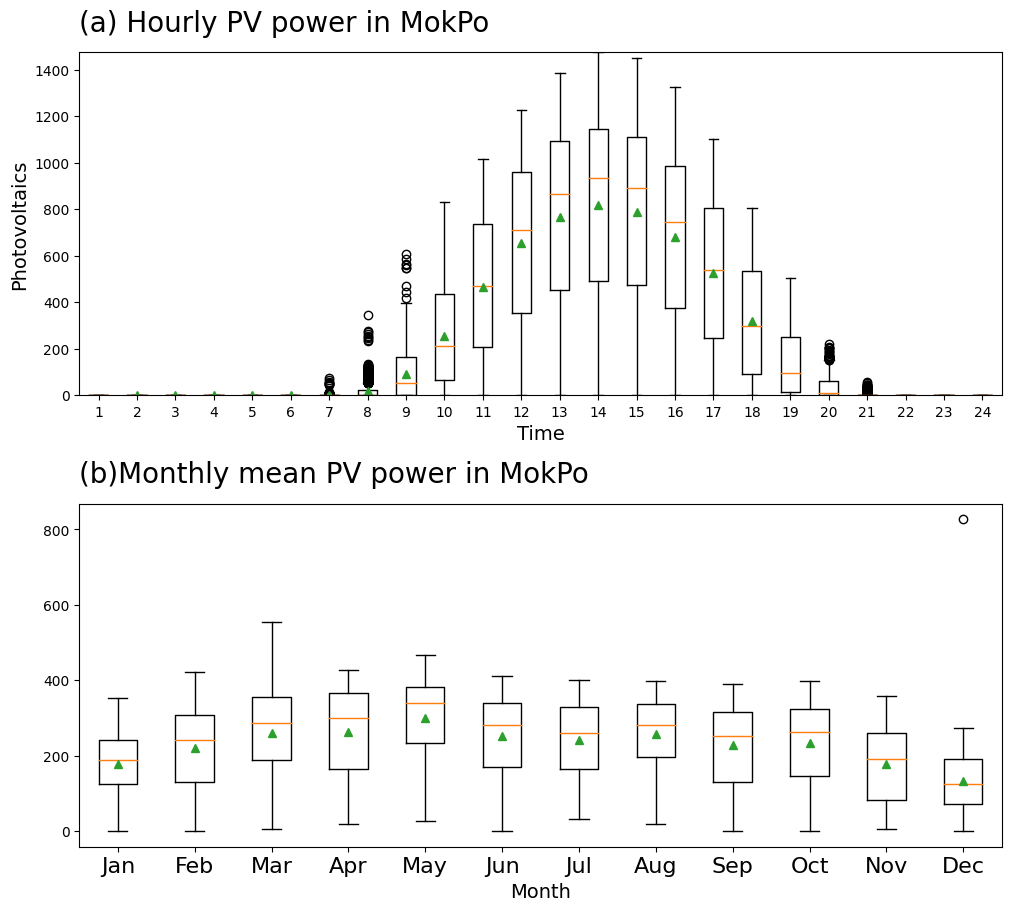

In [ ]:
visualization.Monthly_plot(Mp_df, 'Photovoltaics', 'MokPo')

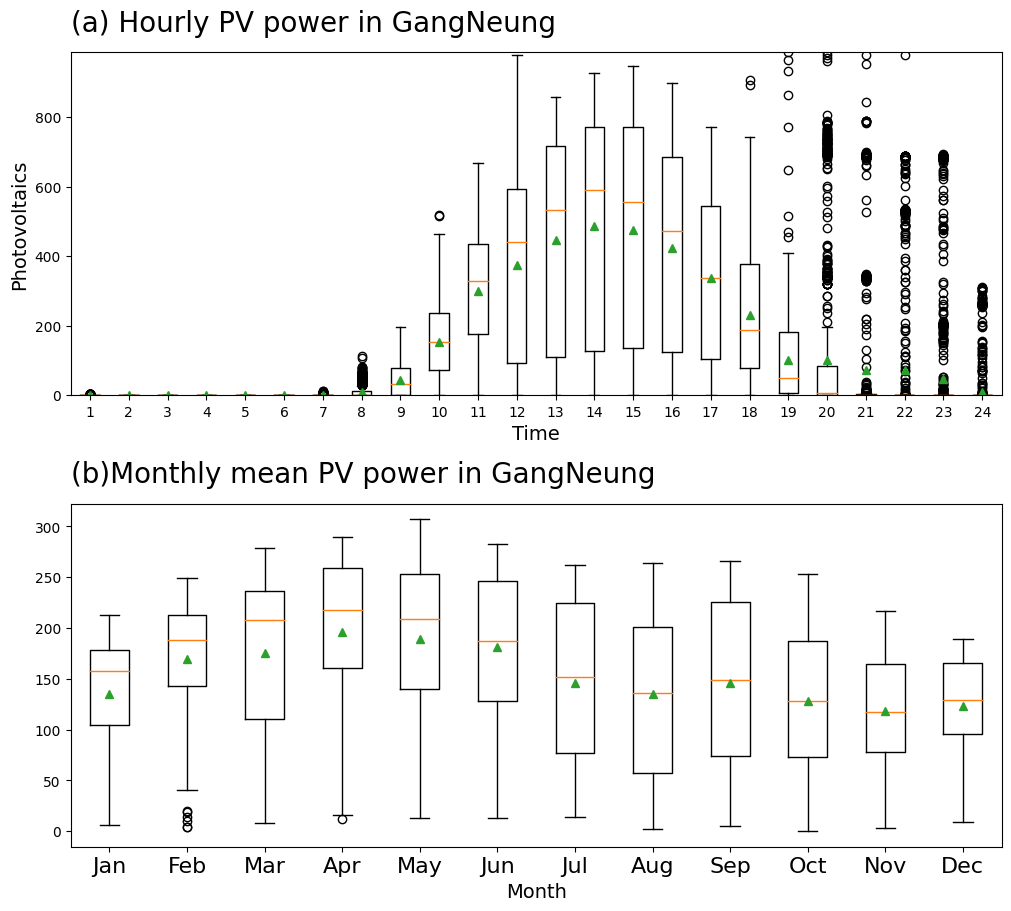

In [ ]:
visualization.Monthly_plot(Gn_df, 'Photovoltaics', 'GangNeung')

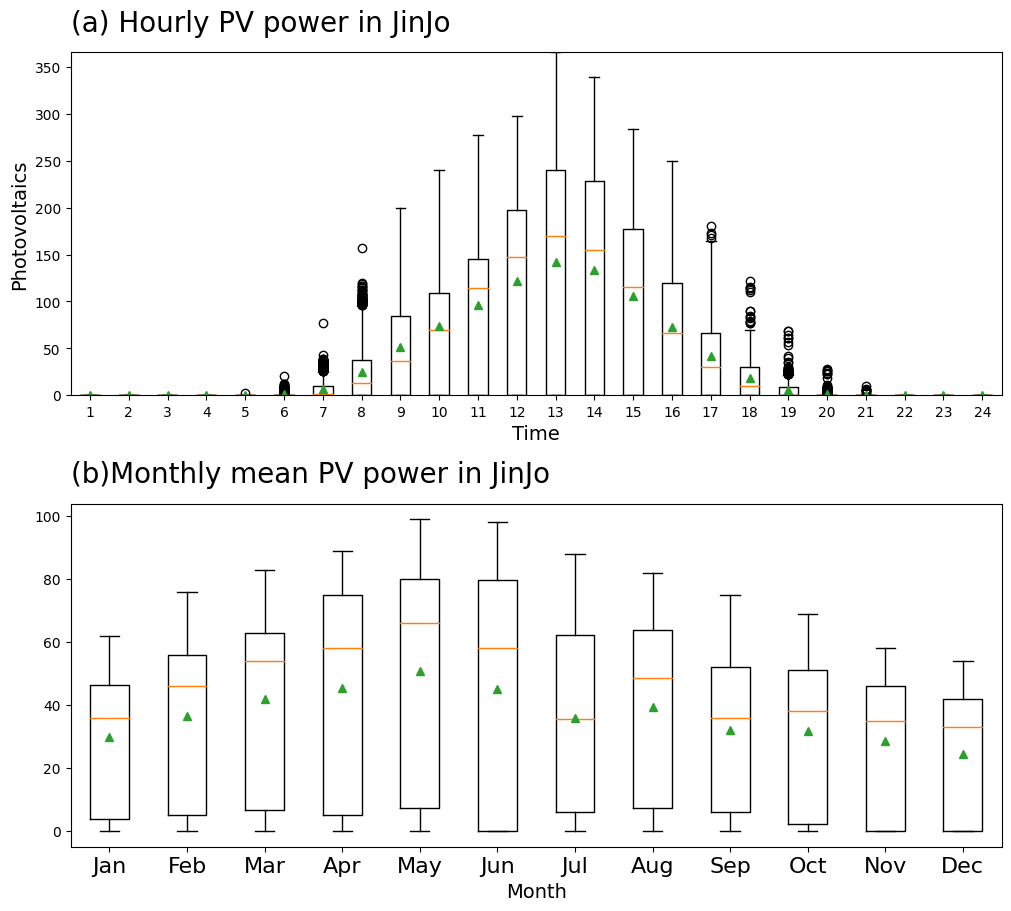

In [ ]:
visualization.Monthly_plot(Jj_df, 'Photovoltaics', 'JinJo')

# Save

In [ ]:
Mapping_df = pd.concat([Mp_df, Gn_df, Jj_df], axis=0)
Mapping_df

,Date,Area,Time,Photovoltaics,PM10,PM25,Temperature,Precipitation,Wind velocity,Wind direction,Humidity,Sea-level pressure,Sunshine,Solar radiation,Cloudy,Visibility,Month
0,2013-01-01,전남 목포시,1,0.0,44.0,NaN,-2.2,NaN,3.7,160.0,95.0,1021.3,NaN,NaN,NaN,NaN,1
1,2013-01-01,전남 목포시,2,0.0,34.0,NaN,-2.4,NaN,3.6,160.0,95.0,1021.2,NaN,NaN,NaN,NaN,1
2,2013-01-01,전남 목포시,3,0.0,41.0,NaN,-2.7,NaN,3.6,160.0,95.0,1020.8,NaN,NaN,7.0,1800.0,1
3,2013-01-01,전남 목포시,4,0.0,41.0,NaN,-2.9,NaN,4.0,160.0,94.0,1020.0,NaN,NaN,7.0,1800.0,1
4,2013-01-01,전남 목포시,5,0.0,35.0,NaN,-2.4,NaN,3.0,160.0,91.0,1019.3,NaN,NaN,10.0,1200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33253,2020-11-16,경남 진주시,20,0.0,NaN,NaN,10.5,NaN,0.3,0.0,73.0,1026.2,NaN,NaN,7.0,1422.0,11
33254,2020-11-16,경남 진주시,21,0.0,NaN,NaN,11.1,NaN,0.1,0.0,75.0,1026.3,NaN,NaN,10.0,1285.0,11
33255,2020-11-16,경남 진주시,22,0.0,NaN,NaN,10.6,NaN,0.3,0.0,74.0,1026.9,NaN,NaN,8.0,1169.0,11
33256,2020-11-16,경남 진주시,23,0.0,NaN,NaN,10.1,NaN,0.4,0.0,77.0,1026.9,NaN,NaN,9.0,1233.0,11


In [ ]:
Mapping_df.to_csv('/content/gdrive/MyDrive/SolarPower/MapDf.csv' , index=False)